# Tabular Data Explanation Benchmarking: Xgboost Regression

This notebook demonstrates how to use the benchmark utility to benchmark the performance of an explainer for tabular data. In this demo, we showcase explanation performance for [TreeExplainer][treeexplainer_doclink]. The metrics used to evaluate are "keep positive" and "keep negative". The masker used here is [IndependentMasker][indmasker_doclink] but can also generalize to other tabular maskers. 

The new `benchmark` utility uses the new API with MaskedModel as wrapper around user-imported model and evaluates masked values of inputs.

[treeexplainer_doclink]: ../../../generated/shap.TreeExplainer.rst#shap.TreeExplainer
[indmasker_doclink]: ../../../generated/shap.maskers.Independent.rst#shap.maskers.Independent

In [2]:
import xgboost
from sklearn.model_selection import train_test_split

import shap
import shap.benchmark as benchmark

## Load Data and Model

In [3]:
# create trained model for prediction function
untrained_model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X, y = shap.datasets.california()
X = X.values

test_size = 0.3
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = untrained_model.fit(X_train, y_train)

## Define Explainer Masker

In [4]:
# use Independent masker as default
masker = shap.maskers.Independent(X)

## Create Explainer Object

In [ ]:
# tree explainer is used
explainer = shap.Explainer(model, masker)

## Run SHAP Explanation

In [12]:
shap_values = explainer(X)

TypeError: 'XGBRegressor' object is not callable

## Define Metrics (Sort Order & Perturbation Method)

In [7]:
sort_order = "positive"
perturbation = "keep"

## Benchmark Explainer

SequentialMasker:   0%|          | 0/20640 [00:00<?, ?it/s]

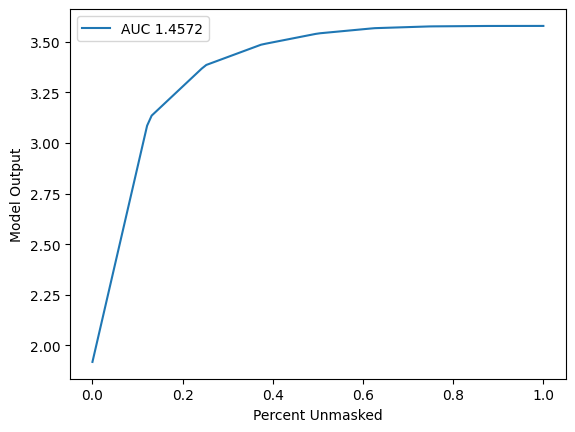

In [8]:
sp = benchmark._sequential.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
sp_result = sp("SequentialPerturbation", shap_values.values, X)
sp.plot(sp_result.curve_x, sp_result.curve_y, sp_result.value)

In [9]:
sort_order = "negative"
perturbation = "keep"

SequentialMasker:   0%|          | 0/20640 [00:00<?, ?it/s]

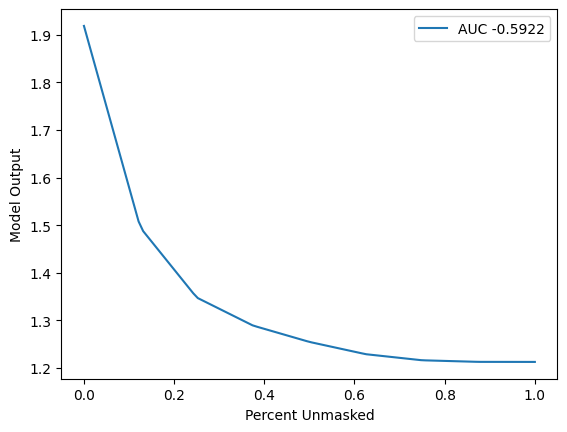

In [10]:
sp = benchmark._sequential.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
sp_result = sp("SequentialPerturbation", shap_values.values, X)
sp.plot(sp_result.curve_x, sp_result.curve_y, sp_result.value)